# Introduction to high-level tensorflow 2.0 using keras
(adapted from https://www.tensorflow.org/tutorials/quickstart/beginner).

In [ ]:
# get tensorflow 2.0 (run once per session)
# pip install tensorflow==2.0

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
print('tensorflow version: ' + tf.__version__)

tensorflow version: 2.8.0


In [2]:


# load mnist dataset
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0  # customary normalization to [0, 1]

print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

# Standard Scaling the data
print('Train', x_train.min(), x_train.max(), x_train.mean(), x_train.std())
print('Test', x_test.min(), x_test.max(), x_test.mean(), x_test.std())

x_train = (x_train-x_train.mean())/x_train.std()
x_test = (x_test-x_test.mean())/x_test.std()

print('Train', x_train.min(), x_train.max(), x_train.mean(), x_train.std())
print('Test', x_test.min(), x_test.max(), x_test.mean(), x_test.std())

11501568/11490434 [==============================] - 0s 0us/step
(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)
Train 0.0 1.0 0.1306604762738429 0.3081078038564622
Test 0.0 1.0 0.13251460584233699 0.3104802479305348
Train -0.4240738943915667 2.8215433456893395 -8.196738828119618e-17 1.000000000000001
Test -0.4268052693386959 2.794011535161327 -2.251287591722145e-16 1.0000000000000004


## Simple, two-layer, fully-connected neural network

In [3]:
# define the sequential model (i.e., each layer follows sequentially from the previous)
simple_model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),  # fully-connected, so flatten the image
    tf.keras.layers.Dense(units=128, activation='relu'),  # hidden layer has 128 units
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(10, activation='softmax')  # length-10 output for classification
])

simple_model.compile(optimizer='adam',  # pick an optimizer
                     loss='sparse_categorical_crossentropy',  # pick a loss
                     metrics=['accuracy'])  # pick a metric to monitor

In [4]:
# train model and track validation loss after each epoch:
simple_model.fit(x_train, y_train,
                 epochs=5,
                 batch_size=32,
                 validation_data=(x_test, y_test))

Epoch 1/5
1875/1875 [==============================] - 8s 3ms/step - loss: 0.4078 - accuracy: 0.8737 - val_loss: 0.1598 - val_accuracy: 0.9524
Epoch 2/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2496 - accuracy: 0.9252 - val_loss: 0.1207 - val_accuracy: 0.9629
Epoch 3/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2205 - accuracy: 0.9340 - val_loss: 0.1178 - val_accuracy: 0.9650
Epoch 4/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2021 - accuracy: 0.9380 - val_loss: 0.1106 - val_accuracy: 0.9677
Epoch 5/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1865 - accuracy: 0.9431 - val_loss: 0.1124 - val_accuracy: 0.9680


In [6]:
# let's examine some sample predictions:
#prediction = simple_model.predict_classes(x_test) - this is depreciated
prediction = np.argmax(simple_model.predict(x_test), axis=-1)

print(prediction)
print(y_test)
# incorrect predictions:
incorrect = prediction != y_test
incorrect_indices = np.where(incorrect)[0]
print('error rate = ' + str(np.mean(incorrect)))  # should be 1 - val_accuracy
print('These are the indices corresponding to the test samples that our model got wrong:')
print(incorrect_indices)

[7 2 1 ... 4 5 6]
[7 2 1 ... 4 5 6]
error rate = 0.032
These are the indices corresponding to the test samples that our model got wrong:
[ 149  151  233  247  259  320  321  340  362  381  412  417  435  445
  447  448  465  582  619  659  684  691  707  717  720  740  760  839
  844  881  924  947  951  956  959  965 1014 1044 1062 1082 1107 1112
 1128 1181 1182 1202 1224 1226 1232 1242 1247 1260 1283 1289 1299 1319
 1326 1328 1364 1378 1393 1466 1500 1522 1527 1530 1549 1553 1554 1609
 1621 1634 1681 1709 1717 1718 1751 1754 1790 1819 1850 1878 1901 1930
 1941 1952 2016 2024 2033 2035 2043 2044 2053 2070 2093 2098 2109 2118
 2129 2130 2135 2182 2224 2266 2272 2291 2293 2299 2325 2369 2387 2393
 2406 2414 2422 2447 2488 2514 2534 2598 2607 2617 2631 2654 2713 2760
 2810 2877 2896 2921 2927 2939 2953 2970 2995 3005 3030 3060 3073 3117
 3130 3157 3206 3240 3251 3289 3336 3384 3405 3422 3503 3520 3549 3558
 3559 3567 3597 3604 3674 3681 3718 3727 3730 3751 3767 3776 3780 3796
 3808 3811 

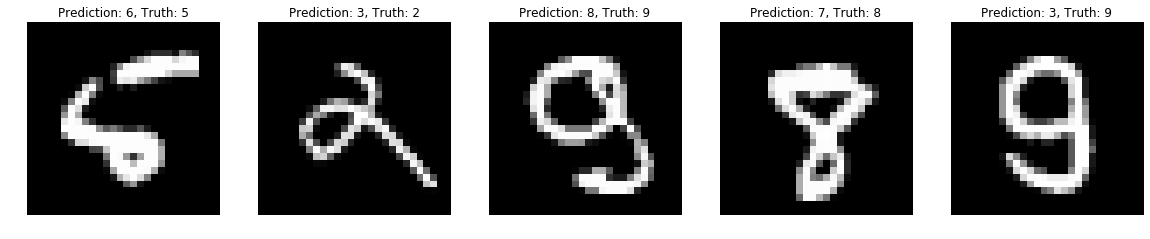

In [ ]:
# plot 5 examples of wrong classifications:
plt.figure(figsize=(20, 5))
for i, i_wrong in enumerate(incorrect_indices[:5]):
  plt.subplot(1, 5, i + 1)
  plt.imshow(x_test[i_wrong], cmap='gray')
  plt.title('Prediction: ' + str(prediction[i_wrong]) + ', Truth: ' + str(y_test[i_wrong]))
  plt.axis('off')
plt.show()

## Convolutional neural network example

In [ ]:
# because we're using CNNs, the data needs a channel dimension:
x_train = x_train[..., None]
x_test = x_test[..., None]

In [ ]:
cnn_model = tf.keras.models.Sequential([
    # let's add some convolutional layers:
    tf.keras.layers.Conv2D(filters=8, kernel_size=5, strides=1, padding='same', activation='relu'),
    tf.keras.layers.Conv2D(filters=16, kernel_size=3, strides=1, padding='same', activation='relu'),
    tf.keras.layers.Conv2D(filters=32, kernel_size=3, strides=2, padding='same', activation='relu'),
    # now, let's transition into a fully-connected layer; first, we flatten:
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units=64, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(10, activation='softmax')  # length-10 output for classification
])

cnn_model.compile(optimizer='adam',  # pick an optimizer
                     loss='sparse_categorical_crossentropy',  # pick a loss
                     metrics=['accuracy'])  # pick a metric to monitor

In [ ]:
# train model and track validation loss after each epoch:
cnn_model.fit(x_train, y_train,
              epochs=2,
              batch_size=32,
              validation_data=(x_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/2
60000/60000 [==============================] - 64s 1ms/sample - loss: 0.1334 - accuracy: 0.9592 - val_loss: 0.0520 - val_accuracy: 0.9832
Epoch 2/2
60000/60000 [==============================] - 64s 1ms/sample - loss: 0.0433 - accuracy: 0.9863 - val_loss: 0.0453 - val_accuracy: 0.9849


In [ ]:
cnn_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              multiple                  320       
_________________________________________________________________
conv2d_1 (Conv2D)            multiple                  9248      
_________________________________________________________________
flatten_1 (Flatten)          multiple                  0         
_________________________________________________________________
dense_2 (Dense)              multiple                  401472    
_________________________________________________________________
dense_3 (Dense)              multiple                  650       
Total params: 411,690
Trainable params: 411,690
Non-trainable params: 0
_________________________________________________________________
